# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("./dataset/train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many Survived??

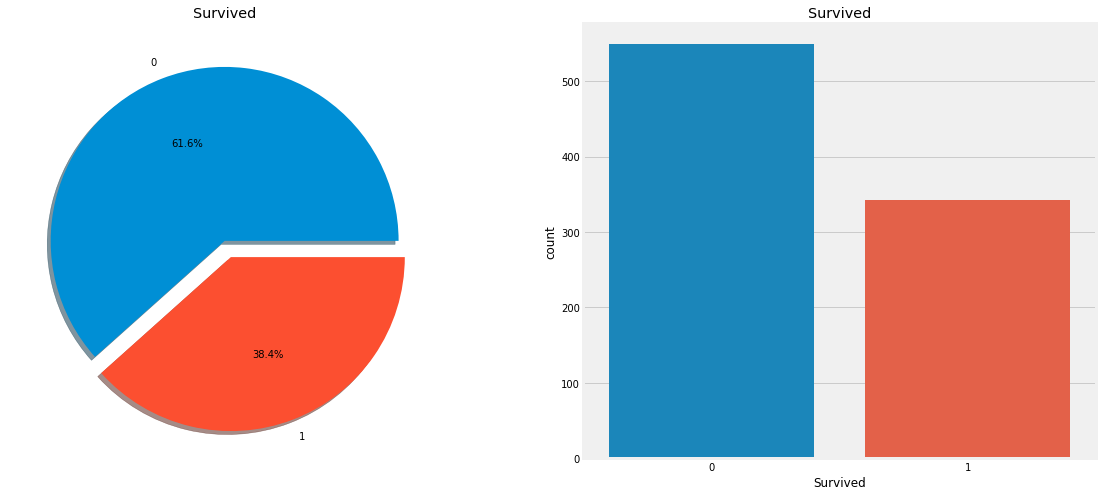

In [6]:
f, ax = plt.subplots(1,2, figsize=(18, 8))

data["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')

sns.countplot("Survived", data=data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

## 1) Analysis of the features
### Types of Features
* Categorical Features
* Ordinal Features
* Continous Feature

### ① Sex --> Categorical Feature

In [7]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

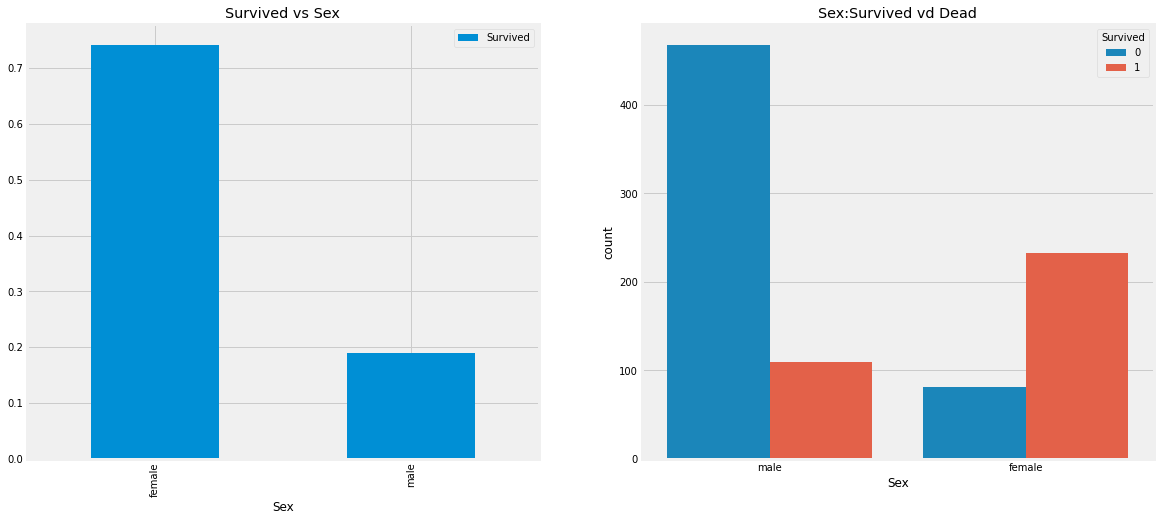

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Sex:Survived vd Dead")

plt.show()

### ③ Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


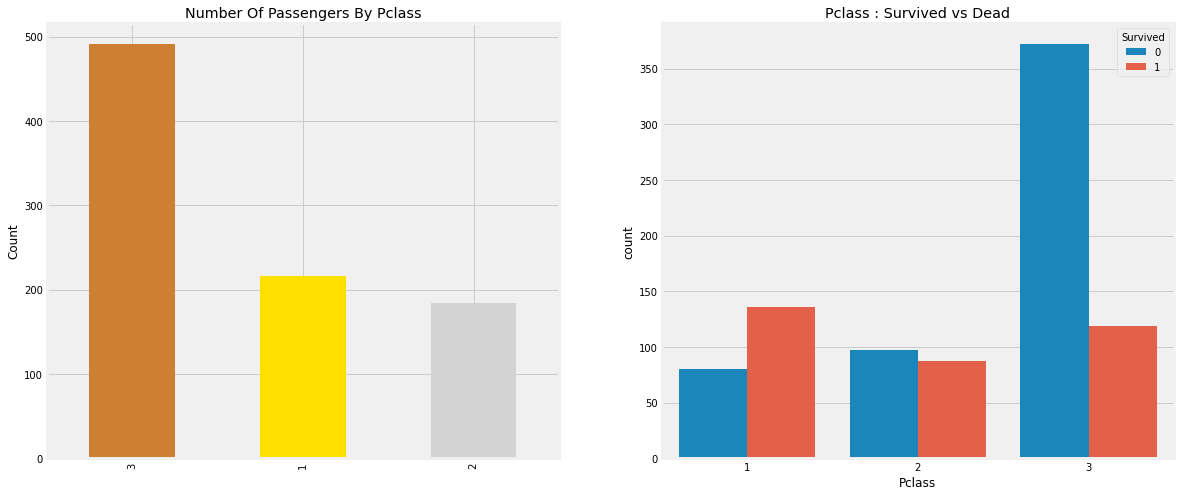

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data["Pclass"].value_counts().plot.bar(color=["#CD7F32", "#FFDF00", "#D3D3D3"], ax=ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Count")

sns.countplot("Pclass", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass : Survived vs Dead")

plt.show()

In [12]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap="summer_r")

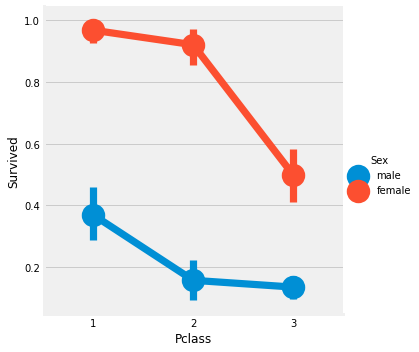

In [14]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=data)
plt.show()

### ④ Age --> Continous Feature

In [18]:
print("Oldest Passenger was of : ", data["Age"].max(), "Years")
print("Youngest Passenger was of : ", data["Age"].min(), "Years")
print("Average Age on the shp : ", data["Age"].mean(), "Years")

Oldest Passenger was of :  80.0 Years
Youngest Passenger was of :  0.42 Years
Average Age on the shp :  29.69911764705882 Years


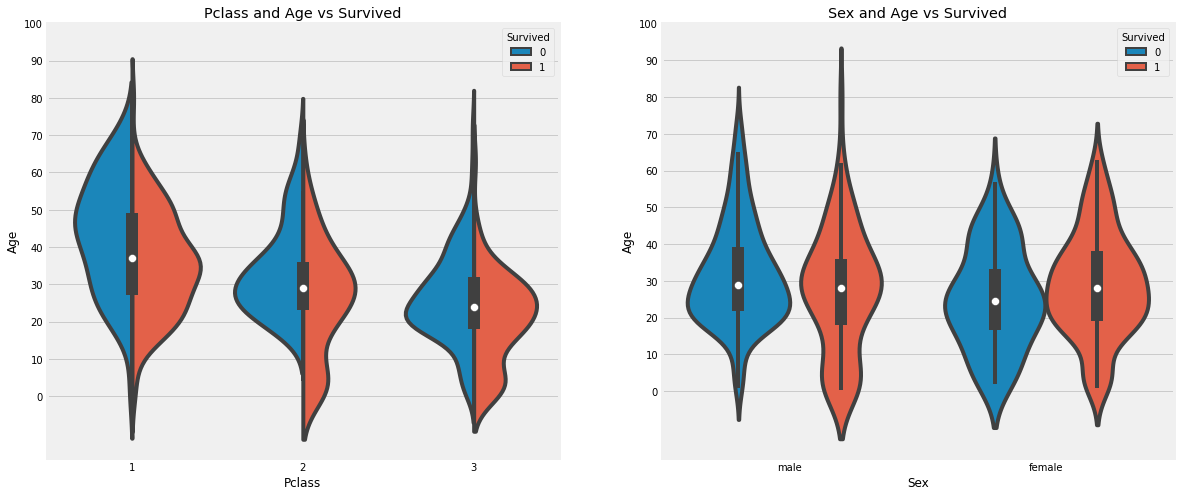

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### What's In A Name?? ---> Feature

In [20]:
data["Initial"] = 0
for i in data:
      data["Initial"] = data.Name.str.extract("([A-Za-z]+)\.")

In [22]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,517,0,0,6,1


In [27]:
data["Initial"].replace(["Mile", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer", "Col", "Rev", "Capt", "Sir", "Don"],
                        ["Miss", "Mr", "Mrs", "Other", "Other", "Other", "Other", "Other", "Other", "Other", "Other", "Other", "Other"], inplace=True)

In [ ]:
data.groupby

## 2)Finding any relations or trends considering multiple features.

# Part2: Feature Engineering and Data Cleaning

## 1)Adding any few features

## 2)Removing redundant features

## 3)Converting features into suitable form for modeling

# Part3: Predictive Modeling

## 1)Running Basic Algorithms

## 2)Cross Validation

## 3)Ensembling

## 4)Important Features Extraction